<a href="https://colab.research.google.com/github/jaytrey777/Coding-Dojo-Food-Sales-Predictions/blob/main/Jason_Tracey_Big_Mart_Sales_Prediction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Mart Sales Prediction

Jason R. Tracey

# Part 1 - Creation

## Tasks

1. Create a GitHub Account

2. Set up a GitHub repository that will house your first portfolio project.

3. Add Markdown cells with your name and section headers to the notebook.

4. Add the Google Colab Notebook to your GitHub repository.

5. Submit the link to your GitHub repo!

# Part 2 - Data Loading & Cleaning

## Tasks

This project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

I will use Pandas to load the data and start exploring and cleaning it.  

1. How many rows and columns?

2. What are the datatypes of each variable?

3. Are there duplicates? If so, drop any duplicates.

4. Identify missing values.

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6. Confirm that there are no missing values after addressing them.

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

Link to the original dataset:

https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

Data Dictionary for the Data Set

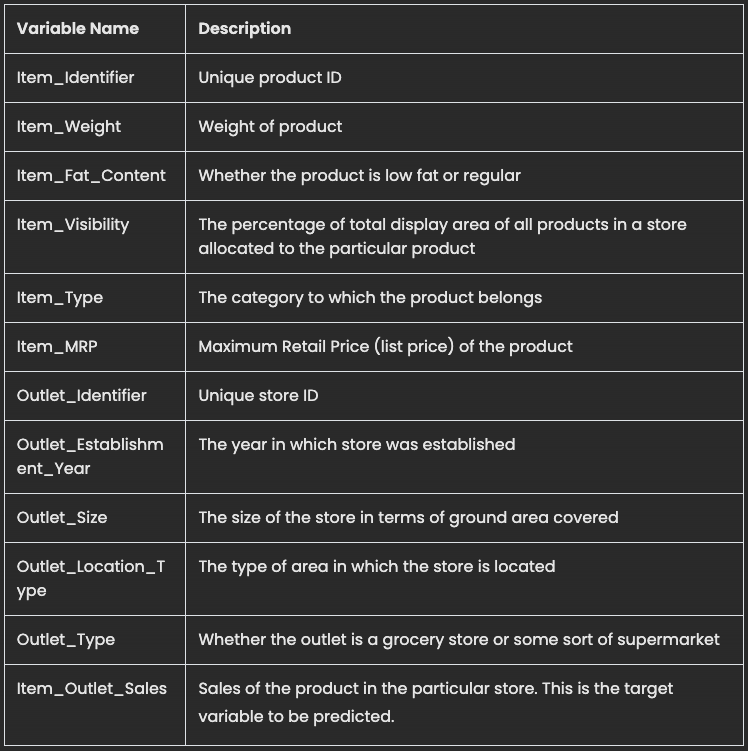

## Imports & Drive Mounting

In [314]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

from sklearn import set_config
set_config(display = 'diagram')

import warnings
warnings.filterwarnings('ignore')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data

In [315]:
filename = '/content/drive/MyDrive/Colab Notebooks/01. Weeks 1-4: Data Science Fundamentals/02 Week 2: Pandas - 3.6.23 & 3.8.23/5. Core Assignments/sales_predictions.csv'
df = pd.read_csv(filename)
df2 = df.copy() # to be used later in maching learning model

In [316]:
df.head() #check to make sure data was uploaded properly

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [317]:
df.info() #gather info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


1. How many rows and columns?

In [318]:
df.shape #gives me rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this data set")

There are 8523 rows and 12 columns in this data set


2. What are the datatypes of each variable?

In [319]:
df.dtypes #shows data types stored in each column
for col in df:
  print(f'Column {col} is a {df[col].dtypes}')
  print()

Column Item_Identifier is a object

Column Item_Weight is a float64

Column Item_Fat_Content is a object

Column Item_Visibility is a float64

Column Item_Type is a object

Column Item_MRP is a float64

Column Outlet_Identifier is a object

Column Outlet_Establishment_Year is a int64

Column Outlet_Size is a object

Column Outlet_Location_Type is a object

Column Outlet_Type is a object

Column Item_Outlet_Sales is a float64



3. Are there duplicates? If so, drop any duplicates.

In [320]:
df.duplicated().sum() #obtain any duplicated rows and add the boolean outputs to see how many rows there are
#df.drop_duplicates() 

0

- There are no duplicate rows in the data.  So there was no need to drop any from the data set. 

- Taking a peek at the number of unique items in each column.  This may be useful later.

In [321]:
df.nunique() # number of unique items in each column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

4. Identify missing values.

In [322]:
print(df.isna().sum()) #obtain any missing data (i.e NaN) and add them to see how many rows contain it in every column.
#df.drop_duplicates() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- Based on the search for missing data, there are:
  - 1463 empty cells in the `Item_Weight` column
  - 2410 empty cells in the `Outlet_Size` column

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- I calculated the percentage of missing data to see if the columns are able to be dropped.

In [323]:
df.isna().sum() / len(df) * 100 #gets the percentage of missing data for each column

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Taking a look at the columns with missing data to see what information I can gather. 

In [324]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [325]:
df['Outlet_Size'].describe(include = 'object')

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

- I will set all the `NaN` values to `zero` in the `'Item_Weight'` column and begin to analyze the data.

In [326]:
df["Item_Weight"].fillna(value = 0, inplace = True)

- For every unique `Item_Identifier` I am going to get the `average weight` for the items using the data in the `Item_Weight` column. Once I have the average weight, I will set all the zero weights to that value for that unique `Item_Identifier`. After I will check to confirm the missing values have been replaced.

In [327]:
counter = 0
a = len(df[df["Item_Weight"] == 0])
b = 0
for name in df["Item_Identifier"]:
  filtered = df[df["Item_Identifier"] == name]
  x = filtered["Item_Weight"].mean()
  if df.iloc[counter,1] == 0:
    df.iat[counter , 1] = x
    if df.iloc[counter,1] != 0:
      b += 1
  counter += 1
print(f"Out of the {counter} rows analyzed, I have replaced {b} pieces of the {a} pieces missing data. There are {a-b} rows that still need to be addressed.")

Out of the 8523 rows analyzed, I have replaced 1459 pieces of the 1463 pieces missing data. There are 4 rows that still need to be addressed.


- Now that I have analyzed the `'Item_Identifier'` column by replacing any zeroes with the corresponding `'Item_Identifier'`, I need to filter my data for any remaining `zeroes`.

In [328]:
df[df['Item_Weight'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,0.0,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,0.0,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,0.0,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,0.0,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- Since the data in this column is numerical, I can clean the data a few different ways. When analyzing numerical colums, dropping rows and columns have different consequences.


- Based on the analysis, it seems best to impute the median value to the 4 missing values. Doing so to this small amount of data would have the least impact to the overall data set. 

In [329]:
counter = 0
a = len(df[df["Item_Weight"] == 0])
b = 0
for name in df["Item_Identifier"]:
  filtered = df[df["Item_Weight"] == 0]
  x = df["Item_Weight"].median()
  if df.iloc[counter,1] == 0:
    df.iat[counter , 1] = x
    if df.iloc[counter,1] != 0:
      b += 1
  counter += 1
print(f"Out of the {counter} rows analyzed, I have replaced {b} pieces of the {a} pieces missing data. There are {a-b} rows that still need to be addressed.")

Out of the 8523 rows analyzed, I have replaced 4 pieces of the 4 pieces missing data. There are 0 rows that still need to be addressed.


In [330]:
# delete_these_rows = [927,1922,4187,5022]

# for item in delete_these_rows:
#   df.drop(item, axis = 0, inplace = True)
df[df['Item_Weight'] == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales



- For the `Outlet_Size` column, I noticed thathe outlet size is related the the `Outlet_Identifier` column. I need to see how many uinque items are in the `Outlet_Identifier` column. From there, I can filter to see which stores have missing vaules and compare and decide the best course of action. 

In [331]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [332]:
df_store_nan = df[df['Outlet_Size'].isna()] #all the stores without an Outlet Size

In [333]:
df_store_nan["Outlet_Identifier"].value_counts() #Get the counts of the stores that are missing data

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

- I am missing the `Outlet_Size` data for 3 stores.  I want to replace the data with the text `'Missing'` because I dont want to assume the wrong size store. Having 3 stores say missing is not critical and wont skew the data too much with the stores are filtered by size. 

In [334]:
x = 'Missing'
df["Outlet_Size"].fillna(value = x, inplace = True)

6. Confirm that there are no missing values after addressing them.

In [335]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- After a search again, I can confirm there are no missing values.

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

- Looking at the columns that contain objects, I need to analyze them and see if there are some I should investigate further. 

In [336]:
df.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


- I decided not to do the `Item_Identifier` column. That column has `1559` unique items and doesn't seem like it is necessary to analyze all `1559` items for differences.  

In [337]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- `Item_Fat_Content` has items in the column that are seemingly redundant. Based on the list, I want to replace `'low fat'` and `'LF'` with `'Low Fat'` as well as replace `'reg'` with `'Regular'` and check to make sure the changes were made.

In [338]:
df.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [339]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [340]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [341]:
df["Outlet_Size"].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [342]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [343]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- None of the other columns have any data that needs to be looked at. All items have unique identifiers and are spelled correctly.  

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [344]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.372472,0.066132,140.992782,1997.831867,2181.288914
std,4.633512,0.051598,62.275067,8.371760,1706.499616
min,1.800000,0.000000,31.290000,1985.000000,33.290000
25%,8.365000,0.026989,93.826500,1987.000000,834.247400
50%,12.150000,0.053931,143.012800,1999.000000,1794.331000
75%,16.200000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Here are the statistics for all of the numerical columns. We can use this to analyze data.

# Part 3 - Exploratory Visuals

## Tasks

Continued work on the sales prediction project. The goal of this section is to help understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For this section I will complete statistical analyses that might help understand, explain, or model with the data, including at least one of each:

- Histogram to view the distributions of various features in the dataset.
- Boxplot to view statistical summaries of various features in the dataset.
- Heatmap of the correlation between features.

In [345]:
df.info() #Lets look at the data and the data types one more time...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Histogram

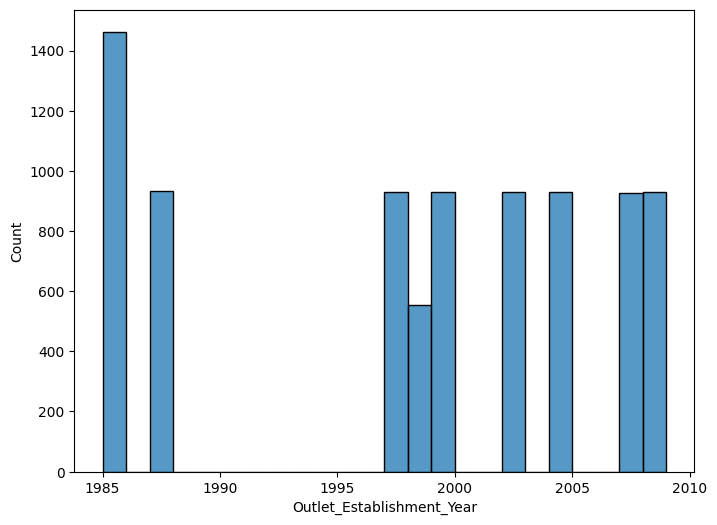

In [346]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, x = 'Outlet_Establishment_Year', bins = 24);

- This histogram shows that over `1400` stores were established in `1985`, but there were less than `600` established in `1998`. There were also no stores established between `1988` and `1997`, but there were a litte over `900` stores established all of the other years.

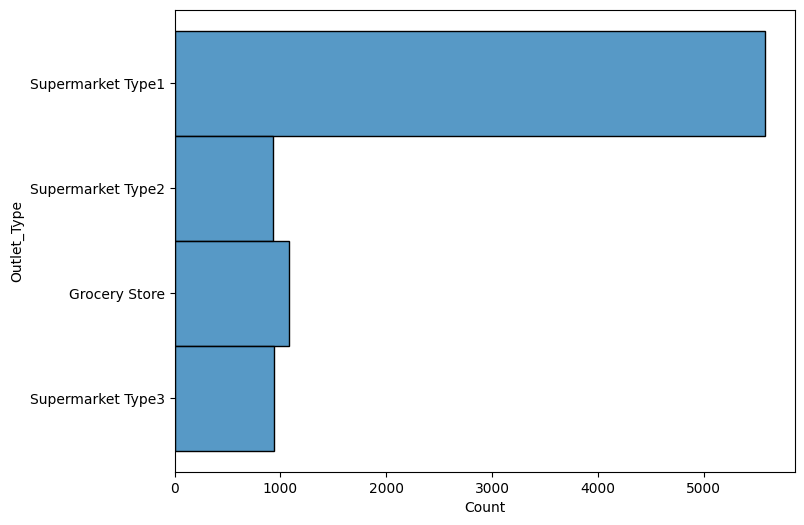

In [347]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.histplot(data = df, y = 'Outlet_Type');

This histogram shows that the majority of the stores are `Supermarket Type 1` with around `5500` stores. The 3 other types of stores only have around `1000` stores each.

## Box Plots

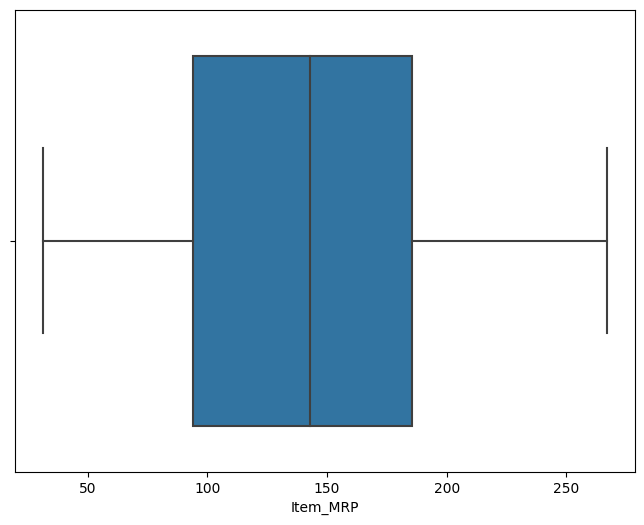

In [348]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df, x = 'Item_MRP')

- This box plot shows that the median price of the items is a little less than `$150` where the majority of the prices are between `$90` and `$190`. The max pirce is around `$260` and the minimum price is around `$30`.

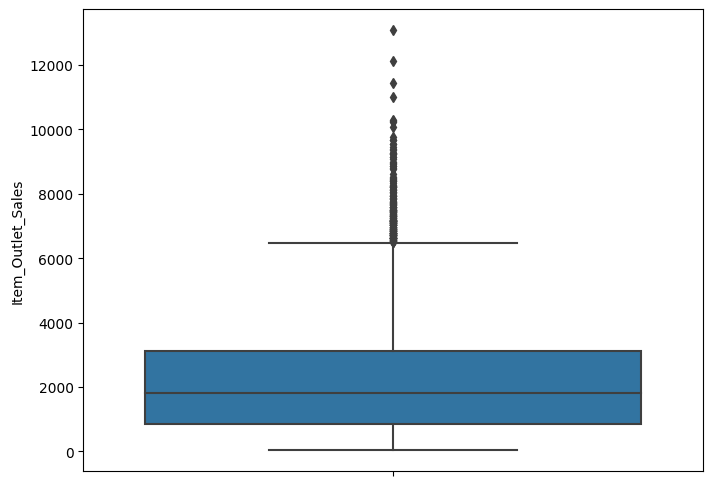

In [349]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.boxplot(data = df, y = 'Item_Outlet_Sales')

- This box plot shows that the median sales for the stores is around `1800 units` and the majority of the stores sell between `800` and `3000 units`.  

## HeatMap

In [350]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.031946,0.027746,0.152942,-0.002049
Item_Visibility,-0.031946,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027746,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.152942,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.002049,-0.128625,0.567574,-0.049135,1.000000


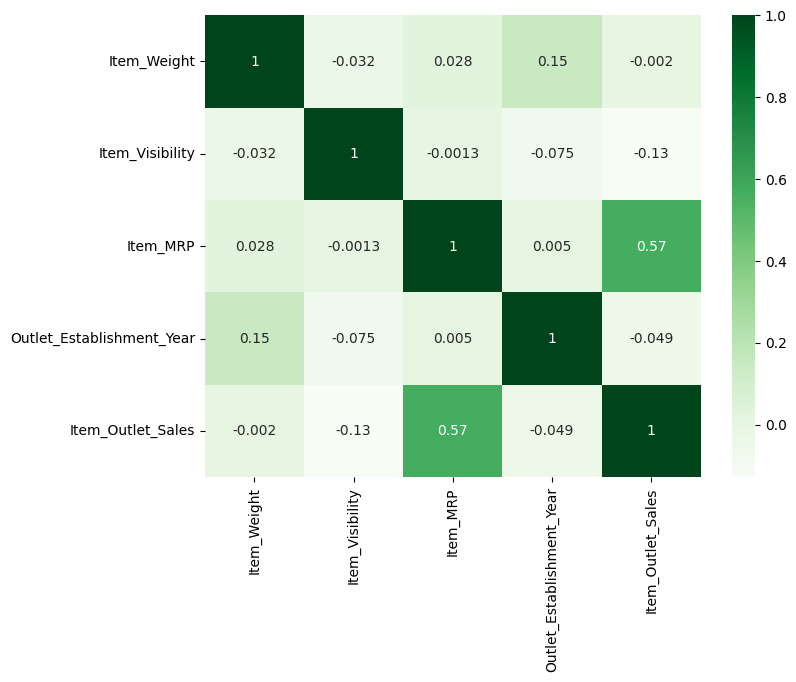

In [351]:
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.heatmap(corr, cmap= 'Greens', annot = True)

This heatmap shows there arent many correlations between the data. The `Outlet Sales` and `MRP` have a `moderate positive correlation` suggesting that as a store sales more of a certain item the price of the item increases.

# Part 4 - Explanatory Visuals

## Tasks

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

- Build on your previous cleaning, exploration, and analysis.
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Store Sales vs. Item Type

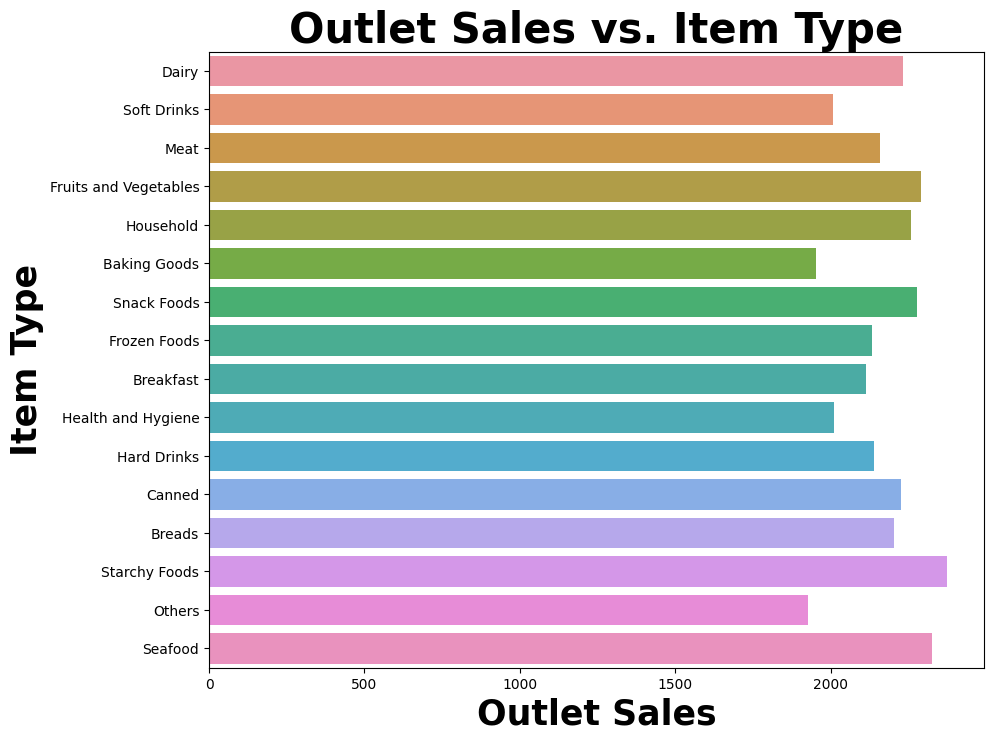

In [353]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(data = df, x = 'Item_Outlet_Sales', y ='Item_Type', ci = None);

ax.set_title('Outlet Sales vs. Item Type', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item Type', fontsize = 25, fontweight = 'bold');



- This `barchart` shows that the most sold item is `starchy foods` and the least is `other` types of food. It also shows that the type of food does not influence sales a lot as there is not one category that is a far and away leader.

##  Store Sales vs. Item Visibility

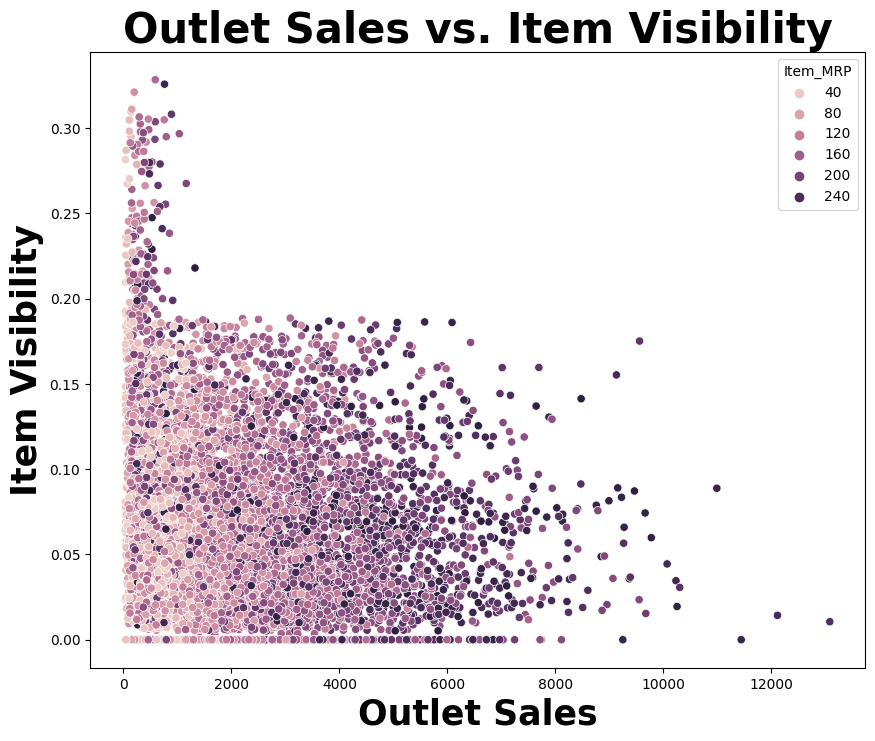

In [354]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y ='Item_Visibility', hue= 'Item_MRP');

ax.set_title('Outlet Sales vs. Item Visibility', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item Visibility', fontsize = 25, fontweight = 'bold');

- This `Scatter Plot` shows there is `no direct correlation` between the `visibility of items` in outlets and the `sales` of the item.  It seems people buy what they need no matter the price or how visible the item is.

##  Store Sales vs. Item MRP

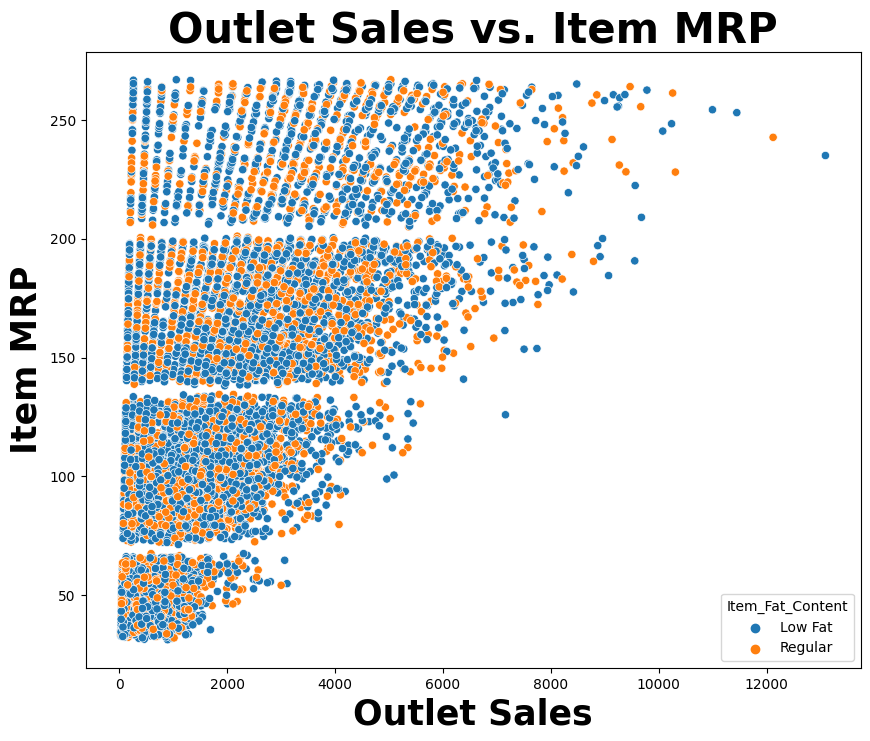

In [355]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(data = df, x = 'Item_Outlet_Sales', y ='Item_MRP', hue = 'Item_Fat_Content');

ax.set_title('Outlet Sales vs. Item MRP', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Sales', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Item MRP', fontsize = 25, fontweight = 'bold');

- This `Scatter Plot` shows that there is a `small positive correlation` between the `outlet sales` and the `price of items`. There is also not a strong correlation betweeen the `fat content` and the `price` or `sales`. 

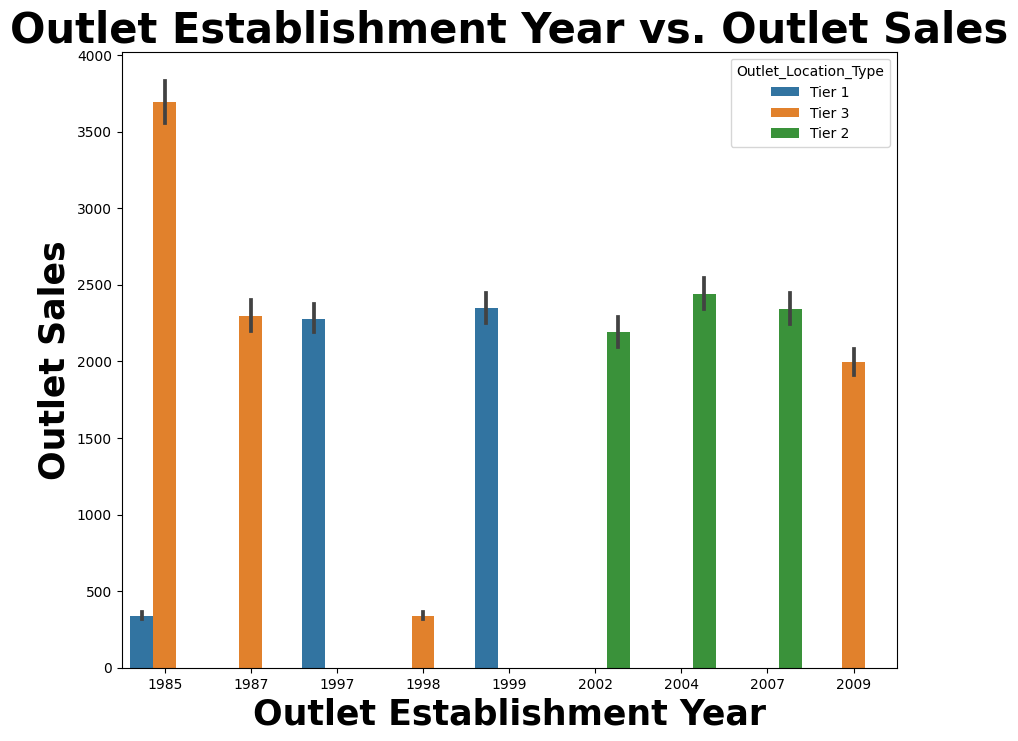

In [356]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(data = df, x = 'Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue = 'Outlet_Location_Type');

ax.set_title('Outlet Establishment Year vs. Outlet Sales', fontsize = 30, fontweight = 'bold');
ax.set_xlabel('Outlet Establishment Year', fontsize = 25, fontweight = 'bold')
ax.set_ylabel('Outlet Sales', fontsize = 25, fontweight = 'bold');

This `Bar Graph` shows that the store that was established in `1985` is `Tier 3` and has the `most sales` and the one established in `1984` is a `Tier 1` store and has the `least sales`.

# Part 5 - Set Up Machine Learning Model

## Tasks

1. Before splitting the data, I will drop duplicates and fix inconsistencies in categorical data.
2. Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as the features matrix.
3. Perform a train test split
4. Make sure the imputation of missing values occurs after the train test split using SimpleImputer.
5. Create a preprocessing object to prepare the dataset for Machine Learning

A quick check to verify the second data set I created at the beginning.

In [357]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Examine Data

In [358]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. Before splitting the data, I will drop duplicates and fix inconsistencies in categorical data.

In [359]:
df2.drop_duplicates(keep = 'first', inplace = True)

Since we had this data set before we know the `Item_Fat_Content` and `Outlet_Size` has `categories` that need to be addressed. I will view and  fix them.

In [360]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [361]:
df2['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}, inplace = True)
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [362]:
df2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [363]:
df2['Outlet_Size'].replace({'High': 'Large'}, inplace = True)
df2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

## Splitting Data with Train/Test Split

2. Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as the features matrix.

I decided to drop the 'Item_Identifier' column due to high cardinality. 1559 is a high number of unique labels which can affect the metrics and increase the runtime. 

In [364]:
target = 'Item_Outlet_Sales'
X = df2.drop(columns = [target, 'Item_Identifier']).copy()
y = df2[target].copy()

3. Perform a train test split

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [366]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [367]:
y_train.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

## Preprocessing the Data

4. Make sure the imputation of missing values occurs after the train test split using SimpleImputer.

Looking at the data set I have several different types of columns. I need to address missing values appropriately in order to train the model properly.

- Item_Weight	(Numerical)
- Item_Fat_Content (Nominal)	
- Item_Visibility	(Numerical)
- Item_Type	(Nominal)
- Item_MRP (Numerical)
- Outlet_Identifier	(Nominal)
- Outlet_Establishment_Year	(Nominal)
- Outlet_Size	(Ordinal)
- Outlet_Location_Type (Ordinal)
- Outlet_Type	(Ordinal)

Here is how I plan to address any missing data.

### Numerical Columns

In [368]:
median_imputer = SimpleImputer(strategy = 'median')
scaler = StandardScaler()

numerical_pipeline = make_pipeline(median_imputer, scaler)

numerical_selector = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

numerical_tuple = (numerical_pipeline, numerical_selector)

### Nominal Columns

In [369]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
constant_imputer = SimpleImputer(strategy='constant', fill_value='missing')

nominal_pipeline = make_pipeline(constant_imputer, ohe)

nominal_selector = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']

nominal_tuple = (nominal_pipeline, nominal_selector)

### Ordinal Columns

In [370]:
size_list = ['Small', 'Medium', 'Large']
location_type_list = ['Tier 1', 'Tier 2', 'Tier 3']
type_list = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

odie = OrdinalEncoder(categories=[size_list, location_type_list, type_list])
frequent_imputer = SimpleImputer(strategy='most_frequent')
scaler2 = StandardScaler()

ordinal_pipeline = make_pipeline(frequent_imputer, odie, scaler2)

ordinal_selector = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

ordinal_tuple = (ordinal_pipeline, ordinal_selector)

5. Create a preprocessing object to prepare the dataset for Machine Learning

In [371]:
preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, numerical_tuple, remainder='drop', verbose_feature_names_out=False)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'Large'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['O...
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier',
                                  'Outlet_Establishment_Year']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Weight', 'Item_Visibility',
                                  'Item_MRP'])],
                  verbose_feature_names_out=False)

In [372]:
X_train_processor = preprocessor.transform(X_train)
X_test_processor = preprocessor.transform(X_test)

In [373]:
X_train_processor

array([[ 0.28737371,  1.08494779,  0.98357205, ...,  0.82748547,
        -0.71277507,  1.82810922],
       [ 0.28737371,  1.08494779,  0.98357205, ...,  0.56664432,
        -1.29105225,  0.60336888],
       [ 0.28737371, -1.38477667, -0.26359965, ..., -0.12102782,
         1.81331864,  0.24454056],
       ...,
       [ 0.28737371, -0.14991444, -0.26359965, ...,  1.12389588,
        -0.92052713,  1.52302674],
       [ 0.28737371, -0.14991444, -0.26359965, ...,  1.77599877,
        -0.2277552 , -0.38377708],
       [-1.38404828, -1.38477667, -0.26359965, ...,  0.82748547,
        -0.95867683, -0.73836105]])

In [374]:
columns = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(X_train_processor, columns=columns)
X_train_df

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Weight,Item_Visibility,Item_MRP
0,0.287374,1.084948,0.983572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.827485,-0.712775,1.828109
1,0.287374,1.084948,0.983572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.566644,-1.291052,0.603369
2,0.287374,-1.384777,-0.263600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.121028,1.813319,0.244541
3,-1.384048,-0.149914,-0.263600,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.158464,-1.004931,-0.952591
4,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.538870,-0.965484,-0.336460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.287374,1.084948,-1.510771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.821742,4.309657,-0.044657
6388,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.649639,1.008625,-1.058907
6389,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.123896,-0.920527,1.523027
6390,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.775999,-0.227755,-0.383777


# Part 6 - Analyze the Model

## Tasks

1. Build a linear regression model to predict sales.

  - Build a linear regression model.
  - Evaluate the performance of your model based on R^2.
  - Evaluate the performance of your model based on RMSE.

2. Build a regression tree model to predict sales.

  - Build a simple regression tree model.
  - Compare the performance of your model based on R^2.
  - Compare the performance of your model based on RMSE.

3. Determine which model to implement

In [375]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing 
  features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['Train MAE', 'Test MAE', 
             'Train MSE', 'Test MSE',
             'Train RMSE', 'Test RMSE', 
             'Train R2', 'Test R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_mse= round(mean_squared_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_mse = round((mean_squared_error(y_test, test_preds)),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_mse, test_mse,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

## Linear Regression Model

In [376]:
lin_reg = LinearRegression() #creates an instance of the model

lin_reg_pipe = make_pipeline(preprocessor, lin_reg) #pipeline for Linear Regression

lin_reg_pipe.fit(X_train, y_train) #fit training data to the pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('st...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [377]:
#Create predictions using data sets
lin_train_predictions = lin_reg_pipe.predict(X_train)
lin_test_predictions = lin_reg_pipe.predict(X_test)

## Display the Model's metrics
lin_reg_scores = model_metrics(lin_reg_pipe, X_train, y_train, X_test, y_test, model_name='Linear Regression')
lin_reg_scores

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Linear Regression,851.5338,811.6894,1304945.3696,1210305.8453,1142.3421,1100.139,0.5591,0.5613


## Decision Tree

In [378]:
#Decision Tree
decision_tree = DecisionTreeRegressor(random_state = 42) # creates instance of the model

decision_tree_pipeline = make_pipeline(preprocessor, decision_tree)

decision_tree_pipeline.fit(X_train, y_train) # fit the model to my training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('st...
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [379]:
#Create predictions using data sets
Decision_train_predictions = decision_tree_pipeline.predict(X_train)
Decision_test_predictions = decision_tree_pipeline.predict(X_test)

## Display the Model's metrics
dec_tree_scores = model_metrics(decision_tree_pipeline, X_train, y_train, X_test, y_test, model_name='Decision Tree')
dec_tree_scores

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Decision Tree,0.0,1048.954,0.0,2345810.2879,0.0,1531.6038,1.0,0.1498


## Bagged Tree

In [380]:
#Bagged Tree
bagged_tree = BaggingRegressor(random_state = 42) # creates instance of the model

bagged_tree_pipeline = make_pipeline(preprocessor, bagged_tree)

bagged_tree_pipeline.fit(X_train, y_train) # fit the model to my training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('st...
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP'])],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [381]:
#Create predictions using data sets
bagged_train_predictions = bagged_tree_pipeline.predict(X_train)
bagged_test_predictions = bagged_tree_pipeline.predict(X_test)

## Display the Model's metrics
bag_tree_scores = model_metrics(bagged_tree_pipeline, X_train, y_train, X_test, y_test, model_name='Bagged Tree')
bag_tree_scores

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Bagged Tree,319.6275,778.9036,239827.0183,1274426.7621,489.7214,1128.9051,0.919,0.5381


## Random Forest

In [382]:
#Random Forest
random_forest = RandomForestRegressor(random_state = 42) # creates instance of the model

random_forest_pipeline = make_pipeline(preprocessor, random_forest)

random_forest_pipeline.fit(X_train, y_train) # fit the model to my training data

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('st...
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [395]:
#Create predictions using data sets
random_forest_train_predictions = random_forest_pipeline.predict(X_train)
random_forest_test_predictions = random_forest_pipeline.predict(X_test)

## Display the Model's metrics
random_forest_scores = model_metrics(random_forest_pipeline, X_train, y_train, X_test, y_test, model_name='Random Forest')
random_forest_scores

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Random Forest,297.1337,765.4305,183128.9777,1212852.2691,427.9357,1101.2957,0.9381,0.5604


## Analysis of Untuned Models

In [396]:
#combine all scores in a table for reference
score_df = pd.concat([lin_reg_scores, dec_tree_scores, bag_tree_scores, random_forest_scores]) 

#Sort by the testing R-Squared Value
score_df.sort_values(by = ['Test R2'], ascending = False)

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Linear Regression,851.5338,811.6894,1304945.3696,1210305.8453,1142.3421,1100.139,0.5591,0.5613
Random Forest,297.1337,765.4305,183128.9777,1212852.2691,427.9357,1101.2957,0.9381,0.5604
Bagged Tree,319.6275,778.9036,239827.0183,1274426.7621,489.7214,1128.9051,0.919,0.5381
Decision Tree,0.0,1048.954,0.0,2345810.2879,0.0,1531.6038,1.0,0.1498


- Without any tuning, `Linear Regression Model` has the best `R Squared Value` and the `Decision Tree` has the worst.  

- Based on these current model metrics, I would use the `Random Forest Model`.  It has the second best `R Squared` and `RMSE` values but has the lowest `MAE` value. The `R Squared` and `RMSE` values are only second by a small margin. The `Random Forest Model` will not be able to account `0.09%` of variance as the `Linear Regression Model`, but will give you predictions that are `$46.26` tigher to actual values on average. 

## Tuning the Selected Model

Since the `Random Forest Model` has the best metrics without tuning, I will tune it for the optimal number of estimators and max depth to see what improvements are made to the model.

### Number of Estimators

In [403]:
from ipywidgets.widgets.interaction import clear_output
# List of estimator values
estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

# Data frame to store the scores
tuned_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])

# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
    print(f'Now running iteration with {num_estimators} estimators')
    random_reg = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
    random_reg_pipeline = make_pipeline(preprocessor, random_reg)
    random_reg_pipeline.fit(X_train, y_train)
    train_score = random_reg_pipeline.score(X_train, y_train)
    test_score = random_reg_pipeline.score(X_test, y_test)
    tuned_scores.loc[num_estimators, 'Train Score'] = train_score
    tuned_scores.loc[num_estimators, 'Test Score'] = test_score
    clear_output()
tuned_scores.head()

,Train Score,Test Score
10,0.919045,0.531447
20,0.927678,0.539197
30,0.931959,0.542102
40,0.933786,0.546971
50,0.935486,0.552075


In [421]:
n_estimators_tuned_scores = tuned_scores.sort_values(by = 'Test Score', ascending = False)
n_estimators_tuned_scores.head(10)

,Train Score,Test Score
140,0.939013,0.561256
130,0.93878,0.561188
150,0.938969,0.56103
120,0.938533,0.560817
100,0.938121,0.560398
90,0.937799,0.560266
160,0.93917,0.560248
170,0.939193,0.560154
110,0.938577,0.559512
80,0.937524,0.559462


When the data is sorted, it shows the best number of estimators for this model is 140.

### Max Depth

In [420]:
#estimating the max depth for the random forest regression
est_depths = [estimator.get_depth() for estimator in random_forest.estimators_]
max(est_depths)


42

In [425]:
depths = range(1, max(est_depths))
max_depth_tuned_scores = pd.DataFrame(index=depths, columns=['Test Score'])
counter = 1
for depth in depths:    
    print(f'Now running iteration with {counter} depth')
    max_depth_rf_model = RandomForestRegressor(random_state = 42, n_estimators = 140, max_depth=depth)
    max_depth_rf_model_pipe = make_pipeline(preprocessor, max_depth_rf_model)
    max_depth_rf_model_pipe.fit(X_train, y_train)
    max_depth_tuned_scores.loc[depth, 'Train Score'] = max_depth_rf_model_pipe.score(X_train, y_train)
    max_depth_tuned_scores.loc[depth, 'Test Score'] = max_depth_rf_model_pipe.score(X_test, y_test)
    clear_output()
    counter += 1
max_depth_tuned_scores.head()

,Test Score,Train Score
1,0.243476,0.253207
2,0.466333,0.462876
3,0.544879,0.543436
4,0.59719,0.595848
5,0.603107,0.610398


In [426]:
max_depth_tuned_scores = max_depth_tuned_scores.sort_values(by = 'Test Score', ascending = False)
max_depth_tuned_scores.head(10)

,Test Score,Train Score
5,0.603107,0.610398
6,0.601793,0.624416
7,0.599462,0.642981
8,0.597884,0.665743
4,0.59719,0.595848
9,0.59495,0.691922
10,0.59222,0.720658
11,0.589014,0.749837
12,0.585683,0.778796
13,0.5826,0.806339


When the data is sorted, it shows the best max depth is 5 when the number of estimators for this model is 140.

## Analysis of Tuned Model

I will now create a final model with the best hyperparameter settings and evaluate it. 

In [432]:
# Save the index value of the best test score. 
best_n_estimators = n_estimators_tuned_scores.index[0]
best_max_depth = max_depth_tuned_scores.index[0]

# Instantiate and fit the best version of the model
tuned_random_forest = RandomForestRegressor(max_depth = best_max_depth, n_estimators = best_n_estimators, random_state = 42) 
tuned_random_forest_pipeline = make_pipeline(preprocessor, tuned_random_forest)
tuned_random_forest_pipeline.fit(X_train, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'Large'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Supermarket '
                                                                                               'Type3']])),
                                                                  ('st...
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Establishment_Year']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_MRP'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, n_estimators=140,
                                       random_state=42))])

In [434]:
#Create predictions using data sets
tuned_random_forest_train_predictions = tuned_random_forest_pipeline.predict(X_train)
tuned_random_forest_test_predictions = tuned_random_forest_pipeline.predict(X_test)

## Display the Model's metrics
tuned_random_forest_scores = model_metrics(tuned_random_forest_pipeline, X_train, y_train, X_test, y_test, model_name='Tuned Random Forest')
tuned_random_forest_scores

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Tuned Random Forest,755.5323,728.2403,1153009.016,1095017.7989,1073.7826,1046.431,0.6104,0.6031


In [435]:
#combine all scores in a table for reference
score_df = pd.concat([score_df, tuned_random_forest_scores]) 

#Sort by the testing R-Squared Value
score_df.sort_values(by = ['Test R2'], ascending = False)

,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
Tuned Random Forest,755.5323,728.2403,1153009.016,1095017.7989,1073.7826,1046.431,0.6104,0.6031
Linear Regression,851.5338,811.6894,1304945.3696,1210305.8453,1142.3421,1100.139,0.5591,0.5613
Random Forest,297.1337,765.4305,183128.9777,1212852.2691,427.9357,1101.2957,0.9381,0.5604
Bagged Tree,319.6275,778.9036,239827.0183,1274426.7621,489.7214,1128.9051,0.919,0.5381
Decision Tree,0.0,1048.954,0.0,2345810.2879,0.0,1531.6038,1.0,0.1498


- Based on these tuned model metrics, the `Tuned Random Forest Model` has the best metrics in all the `Testing` categories when using `140 estimators` and a `Max depth of 5`. 

- The `Tuned Random Forest Model` will be able to account for `60.31%` of variance in y as explained by x.

- The `Mean Average Error` was off by about `$728.24`

- The `Mean Squared Error` was `$1,095,017.80`

- The `Root Mean Squared Error` had a calculation of `$1046.43`

Using this model to make predictions about the sales for different grocery stores would not be very reliable. Considering the metrics from how the model performed, the model is `underfit` to the data. The model performed similarly on the training data and testing data, suggesting a `bias` with respect the the values being around 60%. There may be some different models out there that will perform better to this data set. 